## Note
The paramters in this sample code are similar to  our main training code but we test this code on limited number of data for the sake of speed


## Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7AL39VZ87GnnK37k2q-UCkxdAt202yK_0nkrdMFi31J8JpIlLhSzs
Mounted at /content/drive


## Data directory 

In [3]:
import glob
import os
import numpy as np
from tqdm import tqdm

folder_npy = '/content/drive/MyDrive/ct-normal-slices-train'

file_paths = glob.glob(os.path.join(folder_npy, '*.npy'))
file_paths.sort()
print(file_paths)
print(len(file_paths))

['/content/drive/MyDrive/ct-normal-slices-train/CPCR_0001_296_383_383_CR_P001.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0002_266_309_309_CR_P002.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0003_268_372_372_CR_P003.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0004_328_372_372_CR_P004.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0005_288_369_369_CR_P005.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0006_286_333_333_CR_P006.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0007_302_310_310_CR_P007.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0008_318_372_372_CR_P008.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0009_346_366_366_CR_P009.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0010_276_294_294_CR_P010.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0011_270_333_333_CR_P011.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0012_330_375_375_CR_P012.npy', '/c

In [10]:
# Splite data for Health (h) class
h_path = file_paths[31:61]
print(h_path)

['/content/drive/MyDrive/ct-normal-slices-train/H_0001_288_368_368_normal001.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0002_334_384_384_normal002.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0003_338_397_397_normal003.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0004_256_340_340_normal004.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0005_286_310_310_normal005.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0006_288_321_321_normal006.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0007_284_372_372_normal007.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0008_278_337_337_normal008.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0009_290_395_395_normal009.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0010_304_388_388_normal010.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0011_276_382_382_normal011.npy', '/content/drive/MyDrive/ct-normal-slices-train/H_0012_320_380_380_normal012.npy', '/content/drive

## BCDU-net

In [11]:
from __future__ import division
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import Reshape
from keras.layers import core
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import ConvLSTM2D
from keras.optimizers import Adam
    
def BCDU_net_D3(input_size = (128,128,1)):
    N = input_size[0]
    inputs = Input(input_size) 
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # D1
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)     
    conv4_1 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4_1 = Dropout(0.5)(conv4_1)
    # D2
    conv4_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(drop4_1)     
    conv4_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_2)
    conv4_2 = Dropout(0.5)(conv4_2)
    # D3
    merge_dense = concatenate([conv4_2,drop4_1], axis = 3)
    conv4_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_dense)     
    conv4_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_3)
    drop4_3 = Dropout(0.5)(conv4_3)
    
    up6 = Conv2DTranspose(128, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(drop4_3)
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)

    x1 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 128))(drop3)
    x2 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 128))(up6)
    merge6  = concatenate([x1,x2], axis = 1) 
    merge6 = ConvLSTM2D(filters = 64, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal')(merge6)
            
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(64, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv6)
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)

    x1 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 64))(conv2)
    x2 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 64))(up7)
    merge7  = concatenate([x1,x2], axis = 1) 
    merge7 = ConvLSTM2D(filters = 32, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge7)
        
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(32, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv7)
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)    

    x1 = Reshape(target_shape=(1, N, N, 32))(conv1)
    x2 = Reshape(target_shape=(1, N, N, 32))(up8)
    merge8  = concatenate([x1,x2], axis = 1) 
    merge8 = ConvLSTM2D(filters = 16, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge8)    
    
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv9 = Conv2D(1, 1, activation = 'sigmoid')(conv8)

    model = Model(inputs, conv9)
    return model

In [12]:
model = BCDU_net_D3(input_size = (128,128,1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 128, 128, 32) 9248        conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_21[0][0]                  
____________________________________________________________________________________________

### Resizing the slices for BCDUNet model

In [13]:
from skimage.transform import resize

In [14]:
output = np.zeros((1,128,128))
for i in tqdm(h_path):
    data = np.load(i)
    data = resize(data, (data.shape[0],128, 128),anti_aliasing=True)
    output = np.append(output,data,axis=0)
output = output[1:]


100%|██████████| 30/30 [03:12<00:00,  6.43s/it]


### Adding noise

In [15]:
!pip install noise

     |████████████████████████████████| 133kB 4.5MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp37-cp37m-linux_x86_64.whl size=64280 sha256=a7fbfc6688980f55a515cf57f011177f81c0225e0c8a4a41986e8711e0958084
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise


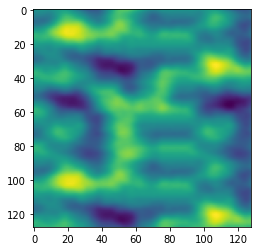

In [17]:
import noise
import cv2

def add_noise(input_array):
    shape = (128,128)
    scale = np.random.randint(10,30)
    # scale = 12
    # scale = 30
    octaves = 10
    persistence = 0.01*np.random.randint(-50,50)
    # persistence = 0.1
    lacunarity = 2.0
    seed = np.random.randint(0,1000)
    # seed = 33
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale, 
                                        j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=140, 
                                        repeaty=140, 
                                        base=seed)
    return cv2.addWeighted(input_array, 1, world, 1, 0)  

import matplotlib.pyplot as plt
a  = np.zeros((128,128))
plt.imshow(add_noise(a)) 

In [18]:
from tqdm import tqdm
noisy_output = np.zeros(output.shape)
for i in tqdm(range(output.shape[0])):
    noisy_output[i] = add_noise(output[i,:,:])


100%|██████████| 8928/8928 [05:10<00:00, 28.71it/s]


In [19]:
'''
Change half of data to original slices (without noise)
Suggestion: you can use random permutation to clean half of data
suggestyion: you can change the rate of being nosisy or clean! 
'''
noisy_output[int(noisy_output.shape[0]/2):] = output[int(noisy_output.shape[0]/2):]

In [20]:
#target (without noise)
output = np.reshape(output,(output.shape[0],output.shape[1],output.shape[2],1))

#input (half noisy)
noisy_output = np.reshape(noisy_output,(noisy_output.shape[0],noisy_output.shape[1],noisy_output.shape[2],1))

### Training the model

In [21]:
model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy')

In [22]:
history = model.fit(noisy_output, output,
            batch_size = 5,
            epochs = 3,
            shuffle=True,
            verbose=1)

Epoch 1/3
1786/1786 [==============================] - 181s 80ms/step - loss: 0.3834
Epoch 2/3
1786/1786 [==============================] - 142s 80ms/step - loss: 0.3640
Epoch 3/3
1786/1786 [==============================] - 143s 80ms/step - loss: 0.3638


In [25]:
'''
However, you can save weights of your model for future use
'''
model.save_weights('/content/drive/My Drive/weight_half_lung_noisy.hdf5')
model.load_weights('/content/drive/My Drive/weight_half_lung_noisy.hdf5')

## 3D CNN model

In [26]:
'''
Load all data to pass through BCDUNet to bold infections in out pipeline
Splite data for each class of COVID (c), Health or Control (h) and Pneumonia or CAP (p)

'''
c_path = file_paths[:31]
h_path = file_paths[31:61]
p_path = file_paths[61:91]
my_file_paths = c_path+h_path+p_path
print(my_file_paths)
print(len(my_file_paths))


['/content/drive/MyDrive/ct-normal-slices-train/CPCR_0001_296_383_383_CR_P001.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0002_266_309_309_CR_P002.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0003_268_372_372_CR_P003.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0004_328_372_372_CR_P004.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0005_288_369_369_CR_P005.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0006_286_333_333_CR_P006.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0007_302_310_310_CR_P007.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0008_318_372_372_CR_P008.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0009_346_366_366_CR_P009.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0010_276_294_294_CR_P010.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0011_270_333_333_CR_P011.npy', '/content/drive/MyDrive/ct-normal-slices-train/CPCR_0012_330_375_375_CR_P012.npy', '/c

### Go Through BCDUNet all slices and pack them

In [27]:
'''
Here, we:
1- Resize different size of slices (2D) -> in x,y axes
2- Predict all slices of a patient using BCDUNET
3- Do subtraction
1- Resize different size of CT images (3D) -> in z axis
'''


from scipy import signal

dataset = np.zeros((len(my_file_paths),50,128,128))
counter = 0
for j in tqdm(my_file_paths):
    print(j)
    CT = np.load(j)
    CT_resized = resize(CT, (CT.shape[0],128, 128),anti_aliasing=True)
    out = model.predict(np.reshape(CT_resized,(CT_resized.shape[0],CT_resized.shape[1],CT_resized.shape[2],1)))
    c = CT_resized-out[:,:,:,0]
    dataset[counter] = resize(c,(50,128,128))
    counter +=1


  0%|          | 0/91 [00:00<?, ?it/s]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0001_296_383_383_CR_P001.npy



  1%|          | 1/91 [00:08<13:14,  8.82s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0002_266_309_309_CR_P002.npy



  2%|▏         | 2/91 [00:15<11:57,  8.06s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0003_268_372_372_CR_P003.npy



  3%|▎         | 3/91 [00:22<11:38,  7.93s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0004_328_372_372_CR_P004.npy



  4%|▍         | 4/91 [00:31<12:00,  8.28s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0005_288_369_369_CR_P005.npy



  5%|▌         | 5/91 [00:40<12:06,  8.45s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0006_286_333_333_CR_P006.npy



  7%|▋         | 6/91 [00:46<10:51,  7.66s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0007_302_310_310_CR_P007.npy



  8%|▊         | 7/91 [00:51<09:47,  6.99s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0008_318_372_372_CR_P008.npy



  9%|▉         | 8/91 [01:00<10:16,  7.43s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0009_346_366_366_CR_P009.npy



 10%|▉         | 9/91 [01:10<11:07,  8.14s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0010_276_294_294_CR_P010.npy



 11%|█         | 10/91 [01:15<09:59,  7.40s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0011_270_333_333_CR_P011.npy



 12%|█▏        | 11/91 [01:20<08:38,  6.48s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0012_330_375_375_CR_P012.npy



 13%|█▎        | 12/91 [01:26<08:35,  6.53s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0013_342_354_354_CR_P013.npy



 14%|█▍        | 13/91 [01:35<09:11,  7.08s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0014_284_310_310_CR_P014.npy



 15%|█▌        | 14/91 [01:41<08:46,  6.84s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0015_296_347_347_CR_P015.npy



 16%|█▋        | 15/91 [01:47<08:26,  6.67s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0016_332_374_374_CR_P016.npy



 18%|█▊        | 16/91 [01:54<08:33,  6.84s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0017_236_319_319_CR_P017.npy



 19%|█▊        | 17/91 [02:03<09:01,  7.32s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0018_314_326_326_CR_P018.npy



 20%|█▉        | 18/91 [02:11<09:20,  7.67s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0019_300_359_359_CR_P019.npy



 21%|██        | 19/91 [02:20<09:37,  8.02s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0020_256_373_373_CR_P020.npy



 22%|██▏       | 20/91 [02:26<08:45,  7.40s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0021_326_375_375_CR_P021.npy



 23%|██▎       | 21/91 [02:36<09:28,  8.12s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0022_250_310_310_CR_P022.npy



 24%|██▍       | 22/91 [02:41<08:23,  7.29s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0023_294_372_372_CR_P023.npy



 25%|██▌       | 23/91 [02:52<09:21,  8.26s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0024_272_328_328_CR_P024.npy



 26%|██▋       | 24/91 [02:58<08:26,  7.56s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0025_318_317_317_CR_P025.npy



 27%|██▋       | 25/91 [03:05<08:05,  7.36s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0026_304_353_353_CR_P026.npy



 29%|██▊       | 26/91 [03:11<07:43,  7.13s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0027_268_372_372_CR_P027.npy



 30%|██▉       | 27/91 [03:18<07:31,  7.05s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0028_270_310_310_CR_P028.npy



 31%|███       | 28/91 [03:24<06:58,  6.65s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0029_262_361_361_CR_P029.npy



 32%|███▏      | 29/91 [03:30<06:46,  6.56s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0030_284_310_310_CR_P030.npy



 33%|███▎      | 30/91 [03:36<06:35,  6.48s/it]

/content/drive/MyDrive/ct-normal-slices-train/CPCR_0031_326_327_327_CR_P050.npy



 34%|███▍      | 31/91 [03:41<06:01,  6.02s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0001_288_368_368_normal001.npy



 35%|███▌      | 32/91 [03:46<05:24,  5.50s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0002_334_384_384_normal002.npy



 36%|███▋      | 33/91 [03:51<05:23,  5.58s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0003_338_397_397_normal003.npy



 37%|███▋      | 34/91 [03:58<05:37,  5.93s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0004_256_340_340_normal004.npy



 38%|███▊      | 35/91 [04:02<04:55,  5.28s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0005_286_310_310_normal005.npy



 40%|███▉      | 36/91 [04:06<04:27,  4.86s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0006_288_321_321_normal006.npy



 41%|████      | 37/91 [04:10<04:09,  4.62s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0007_284_372_372_normal007.npy



 42%|████▏     | 38/91 [04:15<04:07,  4.66s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0008_278_337_337_normal008.npy



 43%|████▎     | 39/91 [04:19<03:57,  4.57s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0009_290_395_395_normal009.npy



 44%|████▍     | 40/91 [04:28<04:55,  5.80s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0010_304_388_388_normal010.npy



 45%|████▌     | 41/91 [04:36<05:20,  6.41s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0011_276_382_382_normal011.npy



 46%|████▌     | 42/91 [04:45<06:02,  7.39s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0012_320_380_380_normal012.npy



 47%|████▋     | 43/91 [04:54<06:10,  7.73s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0013_372_397_397_normal013.npy



 48%|████▊     | 44/91 [05:10<08:07, 10.38s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0014_280_322_322_normal014.npy



 49%|████▉     | 45/91 [05:16<06:54,  9.00s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0015_290_352_352_normal015.npy



 51%|█████     | 46/91 [05:26<06:52,  9.16s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0016_248_308_308_normal016.npy



 52%|█████▏    | 47/91 [05:31<05:48,  7.92s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0017_354_376_376_normal017.npy



 53%|█████▎    | 48/91 [05:42<06:29,  9.05s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0018_272_352_352_normal018.npy



 54%|█████▍    | 49/91 [05:49<05:44,  8.21s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0019_266_318_318_normal019.npy



 55%|█████▍    | 50/91 [05:54<05:01,  7.36s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0020_274_310_310_normal020.npy



 56%|█████▌    | 51/91 [06:01<04:44,  7.11s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0021_310_301_301_normal021.npy



 57%|█████▋    | 52/91 [06:07<04:24,  6.78s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0022_298_372_372_normal022.npy



 58%|█████▊    | 53/91 [06:16<04:52,  7.71s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0023_324_310_310_normal023.npy



 59%|█████▉    | 54/91 [06:25<05:00,  8.12s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0024_334_302_302_normal024.npy



 60%|██████    | 55/91 [06:30<04:11,  6.97s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0025_312_318_318_normal025.npy



 62%|██████▏   | 56/91 [06:35<03:40,  6.30s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0026_294_333_333_normal026.npy



 63%|██████▎   | 57/91 [06:41<03:34,  6.32s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0027_336_394_394_normal027.npy



 64%|██████▎   | 58/91 [06:58<05:16,  9.58s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0028_288_372_372_normal028.npy



 65%|██████▍   | 59/91 [07:06<04:51,  9.12s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0029_274_366_366_normal029.npy



 66%|██████▌   | 60/91 [07:10<03:56,  7.64s/it]

/content/drive/MyDrive/ct-normal-slices-train/H_0030_260_323_323_normal030.npy



 67%|██████▋   | 61/91 [07:14<03:14,  6.47s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0001_336_302_302_cap001.npy



 68%|██████▊   | 62/91 [07:25<03:50,  7.94s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0002_262_323_323_cap002.npy



 69%|██████▉   | 63/91 [07:29<03:07,  6.68s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0003_268_316_316_cap003.npy



 70%|███████   | 64/91 [07:33<02:35,  5.74s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0004_362_343_343_cap004.npy



 71%|███████▏  | 65/91 [07:39<02:35,  6.00s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0005_274_344_344_cap005.npy



 73%|███████▎  | 66/91 [07:50<03:06,  7.45s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0006_314_347_347_cap006.npy



 74%|███████▎  | 67/91 [07:55<02:43,  6.81s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0007_318_329_329_cap007.npy



 75%|███████▍  | 68/91 [08:06<02:59,  7.79s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0008_342_312_312_cap008.npy



 76%|███████▌  | 69/91 [08:10<02:26,  6.68s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0009_380_340_340_cap009.npy



 77%|███████▋  | 70/91 [08:20<02:42,  7.76s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0010_318_346_346_cap010.npy



 78%|███████▊  | 71/91 [08:26<02:27,  7.35s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0011_318_395_395_cap011.npy



 79%|███████▉  | 72/91 [08:37<02:39,  8.37s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0012_374_402_402_cap012.npy



 80%|████████  | 73/91 [08:47<02:39,  8.84s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0013_282_372_372_cap013.npy



 81%|████████▏ | 74/91 [08:55<02:26,  8.61s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0014_324_357_357_cap014.npy



 82%|████████▏ | 75/91 [09:12<02:58, 11.17s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0015_302_310_310_cap015.npy



 84%|████████▎ | 76/91 [09:16<02:15,  9.00s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0016_260_319_319_cap016.npy



 85%|████████▍ | 77/91 [09:23<01:58,  8.45s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0017_274_330_330_cap017.npy



 86%|████████▌ | 78/91 [09:29<01:38,  7.55s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0018_282_297_297_cap018.npy



 87%|████████▋ | 79/91 [09:34<01:23,  6.98s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0019_272_310_310_cap019.npy



 88%|████████▊ | 80/91 [09:40<01:11,  6.49s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0020_266_307_307_cap020.npy



 89%|████████▉ | 81/91 [09:47<01:06,  6.70s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0021_310_310_310_cap021.npy



 90%|█████████ | 82/91 [09:54<01:01,  6.86s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0022_328_392_392_cap022.npy



 91%|█████████ | 83/91 [10:02<00:58,  7.25s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0023_372_352_352_cap023.npy



 92%|█████████▏| 84/91 [10:11<00:54,  7.76s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0024_302_354_354_cap024.npy



 93%|█████████▎| 85/91 [10:18<00:44,  7.45s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0025_352_444_444_cap025.npy



 95%|█████████▍| 86/91 [10:28<00:40,  8.17s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0026_286_479_479_cap026.npy



 96%|█████████▌| 87/91 [10:42<00:39,  9.91s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0027_370_308_308_cap027.npy



 97%|█████████▋| 88/91 [10:51<00:28,  9.55s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0028_316_337_337_cap028.npy



 98%|█████████▊| 89/91 [10:59<00:18,  9.23s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0029_502_358_358_cap029.npy



 99%|█████████▉| 90/91 [11:15<00:11, 11.29s/it]

/content/drive/MyDrive/ct-normal-slices-train/P_0030_576_370_370_cap030.npy



100%|██████████| 91/91 [11:29<00:00,  7.57s/it]


### Prepare labels

In [29]:
'''
Based on the name of files (C: COVID, H: Health , P: Pneumonia or CAP)
'''
lbl = np.zeros((91))
lbl[0:31] = 1 #COVID
lbl[31:61] = 0 #Health
lbl[61:91] = 2 #CAP
print(lbl)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [30]:
'''
For saving the RAM, you can save the data and restart you runtime.
please import librarys again to continue
'''
np.save('/content/drive/My Drive/diff_dataset.npy',dataset)
np.save('/content/drive/My Drive/diff_lbl.npy',lbl)

### 3D CNN training

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D,Dropout
from keras.utils import to_categorical
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [32]:
dataset = np.load('/content/drive/My Drive/diff_dataset.npy')
lbl = np.load('/content/drive/My Drive/diff_lbl.npy')

In [33]:
# reshape the dataset to feed to the model
dataset = np.reshape(dataset,(dataset.shape[0],dataset.shape[1],dataset.shape[2],dataset.shape[3],1))

In [35]:
# for balancing data as the inputs of the model
c = np.random.permutation(np.arange(0,31))
h = np.random.permutation(np.arange(31,61))
p = np.random.permutation(np.arange(61,91))

train_index = np.random.permutation(np.append(np.append(c[0:15],h[0:15]),p[0:15]))
print('training set:', train_index)
validation_index = np.random.permutation(np.append(np.append(c[15:31],h[15:30]),p[15:30]))
print('validation set:',validation_index)

training set: [16 40 33  8 28 76  5 70 51  6 26 18 54 81 83 39 19 60  1 69 71 55 75 35
 80 30 67 49 37 86 47 72 82 15 73 59  9 46 63 10 27 90  7 36 43]
validation set: [57 17 84 22 58 11 14 38 44 68 20 52 31 85  3 88 53  0 50 48 45 66 41 61
 87 25 64 78  2 29  4 62 24 42 65 89 79 74 56 12 21 13 77 32 34 23]


In [37]:
# Convert target vectors to categorical targets
targets_train = to_categorical(lbl[train_index]).astype(np.int32)
targets_validation = to_categorical(lbl[validation_index]).astype(np.int32)

In [38]:
model = Sequential()
model.add(Conv3D(8, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(50,128,128,1)))
model.add(Conv3D(8, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 48, 126, 126, 8)   224       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 48, 126, 126, 8)   1736      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 24, 63, 63, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 24, 63, 63, 16)    3472      
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 24, 63, 63, 16)    6928      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 12, 31, 31, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 31, 31, 32)    1

In [40]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, # or 'mse'
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])


In [42]:
# Fit data to model
history = model.fit(dataset[train_index], targets_train,
            batch_size=16, # batch_size = 16 in paper
            epochs=100, # epochs = 100 in paper
            verbose=1,
            shuffle = True,
            validation_data = (dataset[validation_index],targets_validation))

Epoch 1/100
3/3 [==============================] - 2s 725ms/step - loss: 1.0895 - accuracy: 0.4000 - val_loss: 1.0908 - val_accuracy: 0.3478
Epoch 2/100
3/3 [==============================] - 2s 598ms/step - loss: 1.0723 - accuracy: 0.4444 - val_loss: 1.0885 - val_accuracy: 0.3696
Epoch 3/100
3/3 [==============================] - 2s 595ms/step - loss: 1.0808 - accuracy: 0.4444 - val_loss: 1.0849 - val_accuracy: 0.3696
Epoch 4/100
3/3 [==============================] - 2s 599ms/step - loss: 1.0680 - accuracy: 0.4889 - val_loss: 1.0809 - val_accuracy: 0.3913
Epoch 5/100
3/3 [==============================] - 2s 595ms/step - loss: 1.0455 - accuracy: 0.6000 - val_loss: 1.0768 - val_accuracy: 0.4783
Epoch 6/100
3/3 [==============================] - 2s 596ms/step - loss: 1.0189 - accuracy: 0.6889 - val_loss: 1.0692 - val_accuracy: 0.4783
Epoch 7/100
3/3 [==============================] - 2s 597ms/step - loss: 1.0248 - accuracy: 0.5778 - val_loss: 1.0607 - val_accuracy: 0.4565
Epoch 8/100
3

In [43]:
from sklearn import metrics
matrix = metrics.confusion_matrix(targets_validation.argmax(axis=1), model.predict(dataset[validation_index]).argmax(axis=1))
print(matrix)

[[13  0  2]
 [ 1 14  1]
 [ 3  3  9]]


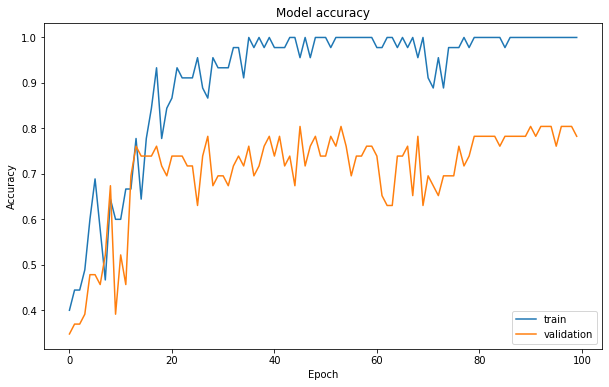

In [44]:
import keras
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

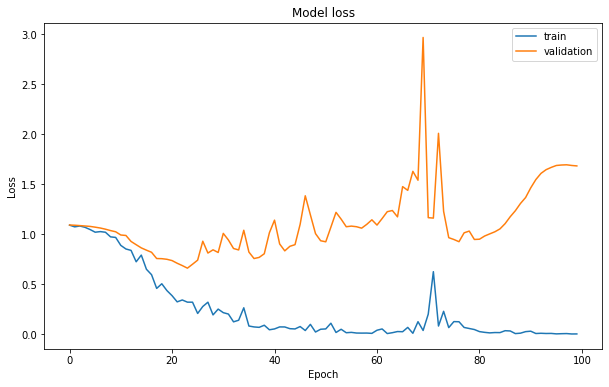

In [45]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### saving

In [46]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("/content/drive/My Drive/weight_cnn_CovidCtNet2d.h5")